In [155]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np

from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Question 1

# Question 2

# Question 3

model1 adjrsqaured: 0.5065592904853231
model1 mse: 2859.6963475867506

the chosen independent variables: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']

model2 rsqaured: 0.5148837959256445
model2 mse: 2876.683251787016


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           3.83e-62
Time:                        20:42:15   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.000    -467.148    -201.986
AGE           -0.0364      0.217     -0.168      0.867      -0.463       0.390
SEX          -22.8596      5.836     -3.917      0.000     -34.330     -11.389
BMI            5.6030      0.717      7.813      0.000       4.194       7.012
BP             1.1168      0.225      4.958      0.000       0.674       1.560
S1            -1.0900      0.573     -1.901      0.058      -2.217       0.037
S2             0.7465      0.531      1.406      0.160      -0.297       1.790
S3             0.3720      0.782      0.475      0.635      -1.166       1.910
S4             6.5338      5.959      1.097      0.273      -5.178      18.245
S5            68.4831     15.670      4.370      0.000      37.685      99.282
S6             0.2801      0.273      1.025      0.306      -0.257       0.817
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                     7.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

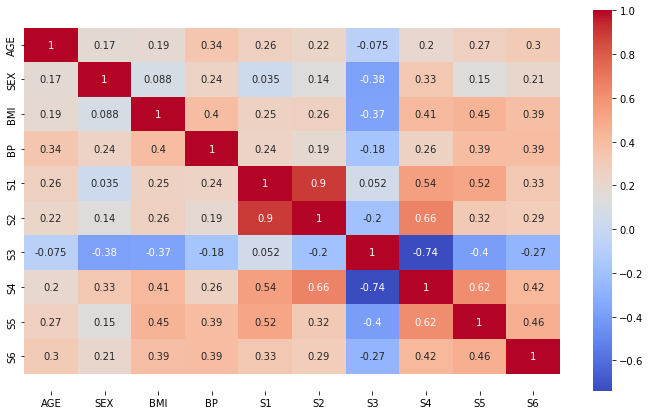

In [181]:

# 3.1 
# read excel file
dfDiabetes = pd.read_excel('Diabetes_Data.xlsx')

# select wanted columns
dfVariables = dfDiabetes[["AGE", "SEX", "BMI", "BP", "S1", "S2", "S3", "S4", "S5", "S6"]]

# calculate correlation and display it in heatmap
fig, ax = plt.subplots(figsize = (12, 7))
sn.heatmap(dfVariables.corr(), annot = True, cmap ='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# 3.3 
# create a linear model
model1 = sm.OLS(dfDiabetes['Y'], sm.add_constant(pd.DataFrame(dfVariables))).fit()

print("model1 adjrsqaured: " + str(model1.rsquared_adj))

# a function that calculates the mean squared error
def mse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual,pred)).mean() 

print("model1 mse: " + str(mse(dfDiabetes['Y'], model1.predict(sm.add_constant(pd.DataFrame(dfVariables))) )))
print()

# a function that use forward regression to select the best model
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    # tracks included variables     
    included = list(initial_list)
    while True:
        changed=False
        # tracks excluded variables
        excluded = list(set(X.columns)-set(included))
        # a series that stores the p-value of every variable         
        new_pval = pd.Series(index=excluded, dtype='float64')
        # for every column that is not already added        
        for new_column in excluded:
            # build a model adding the variable
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            # add the p-value of the variable to our series           
            new_pval[new_column] = model.pvalues[new_column]
        # get the minimum p-value            
        best_pval = new_pval.min()
        # if p-value is less than the significance level         
        if best_pval < threshold_in:
            # get the index of the minimum p-value, which gives us the column name             
            best_feature = new_pval.idxmin()
            # add this column to included list             
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # if the smallest p-value that we have is greater than the significance level, we have found all the best column so break 
        if not changed:
            break
    # return the list of varibles for the best model 
    return included


# c: the chosen predictor variables
print('the chosen independent variables: ' + str(forward_regression(dfVariables, dfDiabetes['Y'],0.05, False)))
print()
# create a model with the chosen variables 
dfChosenVariables = dfDiabetes[['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']]
model2 = sm.OLS(dfDiabetes['Y'], sm.add_constant(pd.DataFrame(dfChosenVariables))).fit()

print("model2 rsqaured: " + str(model2.rsquared))

print("model2 mse: " + str(mse(dfDiabetes['Y'], model2.predict(sm.add_constant(pd.DataFrame(dfChosenVariables))) )))

model1.summary()

# Question 4

the probability of survival of a passenger: 0.3819709702062643
+-----------+-----------+-----------+----------+----------+---------------+-------------+-------------+-------------+--------------+
|   Pclass1 |   Pclass2 |   Pclass3 |     male |   female |   Age12orless |   Age13to19 |   Age20to35 |   Age35to50 |   Age50above |
+===========+===========+===========+==========+==========+===============+=============+=============+=============+==============+
|  0.619195 |  0.429603 |  0.255289 | 0.190985 | 0.727468 |      0.574468 |    0.396947 |    0.388778 |     0.39207 |          0.4 |
+-----------+-----------+-----------+----------+----------+---------------+-------------+-------------+-------------+--------------+
Optimization terminated successfully.
         Current function value: 0.450039
         Iterations 6


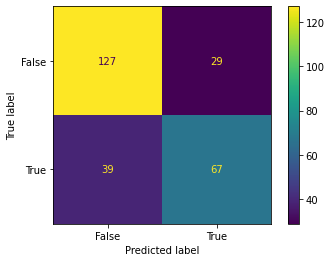

the model's accuracy is: 0.7404580152671756


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  784
Model:                          Logit   Df Residuals:                      780
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.3349
Time:                        21:47:10   Log-Likelihood:                -352.83
converged:                       True   LL-Null:                       -530.50
Covariance Type:            nonrobust   LLR p-value:                 1.045e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9890      0.487     10.238      0.000       4.034       5.944
sex_male      -2.6693      0.198    -13.511      0.000      -3.057      -2.282
age           -0.0397      0.007     -5.371      0.000      -0.054      -0.025
pclass        -1.1977      0.135     -8.898      0.000      -1.462      -0.934
==============================================================================
"""

In [182]:

# 4.2
# read csv file and load into pandas dataframe
dfTitanic = pd.read_csv('titanic3.csv')

# calculate survival probability
prob_survival = dfTitanic['survived'].sum() / len(dfTitanic['survived'])

print("the probability of survival of a passenger: " + str(prob_survival))

# calculate probabilities for age, pclass and sex
prob_pclass1 = dfTitanic['survived'][dfTitanic['pclass'] == 1].sum() / len(dfTitanic[dfTitanic['pclass'] == 1])
prob_pclass2 = dfTitanic['survived'][dfTitanic['pclass'] == 2].sum() / len(dfTitanic[dfTitanic['pclass'] == 2])
prob_pclass3 = dfTitanic['survived'][dfTitanic['pclass'] == 3].sum() / len(dfTitanic[dfTitanic['pclass'] == 3])

prob_male = dfTitanic['survived'][dfTitanic['sex'] == 'male'].sum() / len(dfTitanic[dfTitanic['sex'] == 'male'])
prob_female = dfTitanic['survived'][dfTitanic['sex'] == 'female'].sum() / len(dfTitanic['survived'][dfTitanic['sex'] == 'female'])

prob_12orless = dfTitanic['survived'][dfTitanic['age'] <= 12 ].sum() / len(dfTitanic[dfTitanic['age'] <= 12 ])
prob_13to19 = dfTitanic['survived'][(dfTitanic['age'] >= 13) & (dfTitanic['age'] <= 19)].sum() / len(dfTitanic[(dfTitanic['age'] >= 13) & (dfTitanic['age'] <= 19)])
prob_20to35 = dfTitanic['survived'][(dfTitanic['age'] >= 20) & (dfTitanic['age'] <= 35)].sum() / len(dfTitanic[(dfTitanic['age'] >= 20) & (dfTitanic['age'] <= 35)])
prob_35to50 = dfTitanic['survived'][(dfTitanic['age'] > 35) & (dfTitanic['age'] <= 50)].sum() / len(dfTitanic[(dfTitanic['age'] > 35) & (dfTitanic['age'] <= 50)])
prob_above50 = dfTitanic['survived'][dfTitanic['age'] > 50 ].sum() / len(dfTitanic[dfTitanic['age'] > 50 ])


# assign data
mydata = [
    [prob_pclass1, prob_pclass2, prob_pclass3, prob_male, prob_female, prob_12orless, prob_13to19, prob_20to35, prob_35to50, prob_above50]
]
 
# create header
head = ["Pclass1", "Pclass2", "Pclass3", "male", "female", "Age12orless", "Age13to19", "Age20to35", "Age35to50", "Age50above"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

# choose relevant columns and drop NA values
dfTitanic = dfTitanic[["survived", "sex", "age", "pclass"]].dropna()
dfTitanic = pd.get_dummies(dfTitanic, columns=["sex"], drop_first=True)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(dfTitanic[["sex_male", "age", "pclass"]], dfTitanic[["survived"]],
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)


# build logistic regression model
model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# predict using the test values
y_pred = model.predict(sm.add_constant(X_test))
# create confusion matrix
conf_m = confusion_matrix(y_test, round(y_pred))

# display confusion matrix with labels and color
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = [False, True])

cm_display.plot()
plt.show()

# calculate accuracy
accuracy = accuracy_score(y_test, round(y_pred))

print("the model's accuracy is: " + str(accuracy))


model.summary()